0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


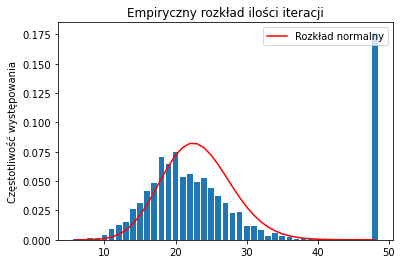

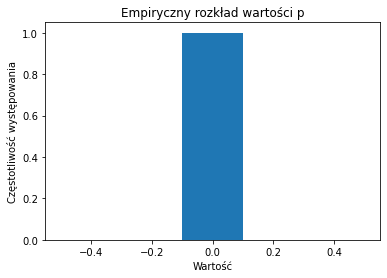

In [35]:
import random
import math
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

def Look_Histogram(freqs):
    s_freq = sum(freqs)
    s_exp = sum(Ef)
    x_s = np.linspace(6, len(freqs) - 1 + 6, num=len(freqs))
    y_s = [freqs[i] / s_freq for i in range(len(freqs))]
    plt.bar(x_s, y_s)
    y_s = [Ef[i] / s_exp for i in range(len(Ef))]
    plt.plot(x_s, y_s, 'red', label="Rozkład normalny")
    plt.title("Empiryczny rozkład ilości iteracji")
    plt.ylabel("Częstotliwość występowania")
    plt.legend(loc="upper right")
    plt.show()
    
    
def Look_P_Hist(p_val):
    x_s = np.linspace(0, len(p_val) - 1, num=len(p_val))
    plt.hist(p_val, bins=len(p_val)//2, weights=np.zeros_like(p_val) + 1. / len(p_val))
    plt.title("Empiryczny rozkład wartości p")
    plt.xlabel("Wartość")
    plt.ylabel("Częstotliwość występowania")
    plt.show()
    
data_2 = open("file.bin", "rb")
data = np.fromfile(data_2, dtype=np.uint32)
nums_data=[]

for number in range(len(data)):
    nums_data.append(data[number] / 256.0)

    
Ef = [21.03,57.79,175.54,467.32,1107.83, 2367.84,
               4609.44,8241.16,13627.81,20968.49,30176.12,40801.97,52042.03,
               62838.28,72056.37,78694.51,82067.55,81919.35,78440.08,72194.12,
               63986.79,54709.31,45198.52,36136.61,28000.28,21055.67,15386.52,
               10940.20,7577.96,5119.56,3377.26,2177.87,1374.39,849.70,515.18,
               306.66, 179.39, 103.24, 58.51, 32.69, 18.03,  9.82, 11.21]
cnt_no_trials = 2000 #1000000
p_vals=[]
chisq=[]
iterator=0
for test in range(10):
    f = [0] * 43
    for test_number in range(cnt_no_trials):
        k = 2147483647
        j = 0
        while (k != 1 and j <= 48):
            #k = math.ceil(k * random.random())
            #################NASZ GENERATOR########
            k = math.ceil(k * (nums_data[iterator]))
            iterator=iterator+1
            #######################################
            j += 1
        if 6 <= j <= 48:
            f[j - 6] += 1
        elif j < 6:
            f[0] += 1
        else:
            f[42] += 1
    
    chi, p_val = stats.chisquare(f_obs=f, f_exp=Ef)
        
    p_vals.append(p_val)
    chisq.append(chi)


for i in range(len(p_vals)):
    print(p_vals[i])
    
Look_Histogram(f)
Look_P_Hist(p_vals)
#print(len(data))